<h1 style='text-align: center'>Vendas de Gasolina no Brasil</h1>
<br>
<h4>Você sabe quais estados brasileiros consomem mais gasolina por ano?</h4>
<br>
<p>Dados publicados no <a href='https://dados.gov.br/dataset/vendas-de-derivados-de-petroleo-e-biocombustiveis'>Portal Brasileiro de Dados Abertos</a>.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'vendas-combustiveis-segmento-m3-2012-2022.csv'
df = pd.read_csv(file_path, sep=';')
df.head()

,ANO,MÊS,UNIDADE DA FEDERAÇÃO,PRODUTO,SEGMENTO,VENDAS
0,2012,JAN,RONDÔNIA,ETANOL HIDRATADO,TRR,0
1,2012,DEZ,DISTRITO FEDERAL,ETANOL HIDRATADO,CONSUMIDOR FINAL,35
2,2012,NOV,DISTRITO FEDERAL,ETANOL HIDRATADO,CONSUMIDOR FINAL,28
3,2012,FEV,RONDÔNIA,ETANOL HIDRATADO,TRR,0
4,2012,MAI,RONDÔNIA,ETANOL HIDRATADO,TRR,0


In [3]:
df.VENDAS = df.VENDAS.str.replace(',', '.').astype(float, copy=False)
df.dtypes

ANO                       int64
MÊS                      object
UNIDADE DA FEDERAÇÃO     object
PRODUTO                  object
SEGMENTO                 object
VENDAS                  float64
dtype: object

In [4]:
df.shape

(30618, 6)

In [5]:
venda_de_gasolina = df[(df['PRODUTO'] == 'GASOLINA C') & (df['ANO'] == 2021)]\
    [['UNIDADE DA FEDERAÇÃO', 'VENDAS']].groupby('UNIDADE DA FEDERAÇÃO')\
        ['VENDAS'].sum().divide(1000000)

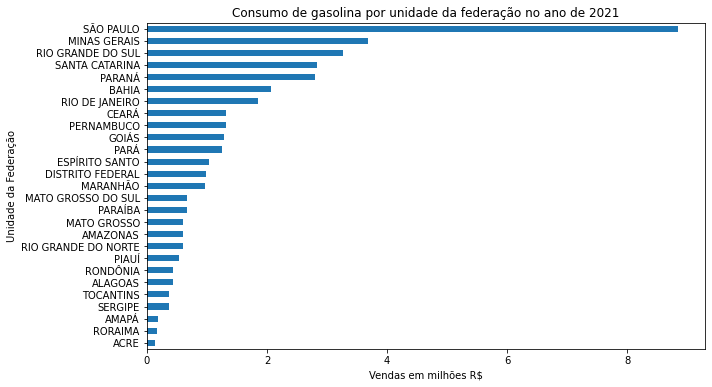

In [6]:
venda_de_gasolina.sort_values().plot.barh(figsize=(10, 6))
plt.title('Consumo de gasolina por unidade da federação no ano de 2021')
plt.ylabel('Unidade da Federação')
plt.xlabel('Vendas em milhões R$')
plt.show()


In [7]:
print('A venda de gasolina em São Paulo em 2021 foi de {:.2f} milhões de reais.'.format(venda_de_gasolina['SÃO PAULO']))

A venda de gasolina em São Paulo em 2021 foi de 8.85 milhões de reais.


([<matplotlib.patches.Wedge at 0x7f3940acd580>,
 [Text(1.3827304877883704, 0.900309057013499, 'São Paulo'),
  Text(-1.3827304877883706, -0.9003090570134987, 'Outros')],
 [Text(0.7542166297027474, 0.4910776674619084, '18%'),
  Text(-0.7542166297027475, -0.49107766746190834, '82%')])

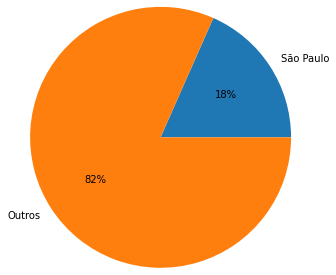

In [8]:
pie = {"São Paulo": venda_de_gasolina['SÃO PAULO'], "Outros": venda_de_gasolina[venda_de_gasolina != 'SÃO PAULO'].sum()}
plt.pie(list(pie.values()), labels=list(pie.keys()), autopct='%.0f%%', radius=1.5)